In [ ]:

# pip install tweepy


In [ ]:

# pip install python-dotenv


In [1]:
from dotenv import load_dotenv

load_dotenv()

True

In [2]:
import os
import tweepy
import time
import pandas as pd



consumer_key = os.environ["API_KEY"]
consumer_secret = os.environ["API_KEY_SECRET"]
access_token = os.environ["ACCESS_TOKEN"]
access_token_secret = os.environ["ACCESS_TOKEN_SECRET"]

auth = tweepy.OAuth1UserHandler(
  consumer_key, 
  consumer_secret, 
  access_token, 
  access_token_secret
)

api = tweepy.API(auth,wait_on_rate_limit = True)

In [3]:
# test access
me = api.verify_credentials()
me.screen_name

'NieEthan'

In [4]:
# get account id
zibo = api.get_user(screen_name = "ZiboOfficial")
print (zibo.id)

1524572386271457281


In [5]:
# get all "ZiboOfficial" followers' id.
zibo_id = zibo.id
zibo_followers = []
try:
    for page in tweepy.Cursor(api.get_follower_ids, user_id=zibo_id).pages():
        zibo_followers.extend(page)
except tweepy.errors.TweepyException:
        print("error")

# This number of zibo_followers is increasing over time.
print ("Thera are total ", len(zibo_followers), "followers of ZiboOfficial.")

Thera are total  2848 followers of ZiboOfficial.


## Get the data of ZiboOfficial followers

### This part of codes will take a very long time. Do not run it. ###
### It just stored some information of all the ZiboOfficial followers### 
### You can just use the csv file ("attributes_1.csv") instead. ###

In [ ]:



# Create an empty DataFrame to store the attributes of "ZiboOfficial" followers
attributes_df_1= pd.DataFrame(columns=["Follower_id","Location","Created_at","Followers_count",
                                     "Friends_count","Favourites_count","Listed_count","Statuses_count"]) 

m = 0
for follower_id in zibo_followers:

    m+=1
    
    
    followerid=follower_id
    
    
    try:
        location= api.get_user(user_id=follower_id).location
    except:
        location=""
    try:
        date= api.get_user(user_id=follower_id).created_at
    except:
        date=""
    try:
        followers_count= api.get_user(user_id=follower_id).followers_count
    except:
        followers_count=""
    try:
        friends_count= api.get_user(user_id=follower_id).friends_count
    except:
        friends_count=""
    try:
        favourites_count= api.get_user(user_id=follower_id).favourites_count
    except:
        favourites_count=""
    try:
        listed_count= api.get_user(user_id=follower_id).listed_count
    except:
        listed_count=""
    try:
        statuses_count= api.get_user(user_id=follower_id).statuses_count
    except:
        statuses_count=""
        
    
    attributes_df_1 = attributes_df_1.append({"Follower_id":followerid,"Location":location,
                                          "Created_at":date,"Followers_count":followers_count,
                                     "Friends_count":friends_count,"Favourites_count":favourites_count,
                                          "Listed_count":listed_count,"Statuses_count":statuses_count},ignore_index=True)
     # Stored in a csv file every time
    attributes_df_1.to_csv("attributes_1.csv",index=False)
    
    print (m, "done", len(zibo_followers)-m, "left.")

## Descriptively Analyze the data of "ZiboOfficial" followers to know the followers better. 

In [6]:
# All the ZiboOfficial followers information
zibo_followers_df=pd.read_csv("attributes_1.csv")
zibo_followers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2601 entries, 0 to 2600
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Follower_id       2601 non-null   int64  
 1   Location          1034 non-null   object 
 2   Created_at        2601 non-null   object 
 3   Followers_count   2601 non-null   int64  
 4   Friends_count     2601 non-null   int64  
 5   Favourites_count  2600 non-null   float64
 6   Listed_count      2601 non-null   int64  
 7   Statuses_count    2601 non-null   int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 162.7+ KB


### Data cleaning

In [7]:
# There are too many followers. Only focus on followers with location. 
# Filter out those followers who have no location. 
zibo_followers_df = zibo_followers_df[zibo_followers_df.Location.notnull()].reset_index(drop=True)
zibo_followers_df

# There are 1034 "ZiboOfficial" followers left. 


,Follower_id,Location,Created_at,Followers_count,Friends_count,Favourites_count,Listed_count,Statuses_count
0,959004975690125312,"Sindh, Pakistan",2018-02-01 10:06:18+00:00,635,3283,106.0,4,275
1,1491681657019322370,Guangdong,2022-02-10 07:53:56+00:00,587,1470,143.0,0,151
2,1552567517222019078,"Dhaka, Bangladesh",2022-07-28 08:12:25+00:00,154,74,771.0,0,268
3,753600103932370944,"From Nzumosu, Numan Adamawa St",2016-07-14 14:40:40+00:00,1171,4598,17315.0,1,526
4,2391240006,NAIROBI KENYA,2014-03-15 15:53:42+00:00,286,3233,235.0,1,205
...,...,...,...,...,...,...,...,...
1029,1277542209907113984,"Shandong Province, China",2020-06-29 09:59:42+00:00,32821,537,772.0,53,2320
1030,1481526036185632773,Zibo,2022-01-13 07:19:22+00:00,3561,2188,2124.0,7,6387
1031,1522123565667352577,Beijing🇨🇳Shanghai🇨🇳 Girl,2022-05-05 07:58:43+00:00,1951,1670,451.0,4,733
1032,1491239140318453762,China,2022-02-09 02:35:03+00:00,9175,3995,690.0,12,4385


In [8]:
# Transform "Created_at" to only year

new_Created_at = []
for date in zibo_followers_df.Created_at.values:
    # print (type(date))
    new = date.split(" ")[0][:4]
    # print (new)
    new_Created_at.append(new)
    
zibo_followers_df.Created_at = new_Created_at
zibo_followers_df.head()

,Follower_id,Location,Created_at,Followers_count,Friends_count,Favourites_count,Listed_count,Statuses_count
0,959004975690125312,"Sindh, Pakistan",2018,635,3283,106.0,4,275
1,1491681657019322370,Guangdong,2022,587,1470,143.0,0,151
2,1552567517222019078,"Dhaka, Bangladesh",2022,154,74,771.0,0,268
3,753600103932370944,"From Nzumosu, Numan Adamawa St",2016,1171,4598,17315.0,1,526
4,2391240006,NAIROBI KENYA,2014,286,3233,235.0,1,205


In [9]:
# Change column value data type.

zibo_followers_df=zibo_followers_df.astype({"Follower_id":str,"Created_at": int})

### Analyze data

In [10]:

zibo_followers_df.describe()

# Values have very large range except Created_at.

## For Followers_count, there are several China official Twitter accounts who followed "ZiboOfficial", 
## such as "zlj517" who has 1.8M followers and he is the Spokesman & DDG, Information Department, Foreign Ministry, China. 
## so the median is not very high compared to the mean. 



,Created_at,Followers_count,Friends_count,Favourites_count,Listed_count,Statuses_count
count,1034.00000,1.034000e+03,1034.000000,1033.000000,1034.00000,1034.000000
mean,2018.84236,4.245518e+03,3208.501934,6792.048403,8.56383,3646.494197
std,4.00161,6.031001e+04,9721.505523,23373.348180,114.20874,14542.352982
min,2007.00000,0.000000e+00,21.000000,0.000000,0.00000,0.000000
25%,2016.00000,1.510000e+02,1306.250000,130.000000,0.00000,65.000000
50%,2021.00000,3.840000e+02,2353.000000,1104.000000,0.00000,311.500000
75%,2022.00000,7.730000e+02,3923.500000,4318.000000,1.00000,1643.250000
max,2022.00000,1.856088e+06,190712.000000,411611.000000,3402.00000,253030.000000


2022    425
2021    146
2020     70
2017     50
2016     48
2018     40
2019     37
2013     36
2012     35
2011     32
2015     31
2014     29
2010     27
2009     22
2008      5
2007      1
Name: Created_at, dtype: int64


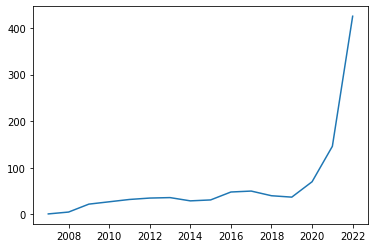

In [11]:
import matplotlib as plt
import seaborn as sns


print (zibo_followers_df.Created_at.value_counts())
zibo_followers_df.Created_at.value_counts().sort_index().plot.line()

# Most of ZiboOfficial followers were created at 2022, they are new users for Twitter.

In [12]:
# Try to identify which country has the most ZiboOfficial followers.

zibo_followers_df.Location.value_counts()[:10]

# There are many people from the same city in some African countries, such as Kenya, Uganda, Nigeria, Ghana, Tanzania.


Nairobi, Kenya             28
Kampala, Uganda            21
Lagos, Nigeria             15
Nigeria                    12
Accra, Ghana               11
Dar es Salaam, Tanzania    10
Dhaka, Bangladesh           9
Lahore, Pakistan            9
Beijing                     8
Pakistan                    8
Name: Location, dtype: int64

In [13]:
# Find out the amount of followers comes from one country.

temp_country = []
location_list = zibo_followers_df.Location.value_counts().index.to_list()
location_list

for c in location_list:
    if len(c)==1:
        c=c
    else:
        c=c.split(" ")[-1]
    
    temp_country.append(c)
    
    
country_list=[]
[country_list.append(x) for x in temp_country if x not in country_list]

follower_country = zibo_followers_df.Location.value_counts()
follower_count_by_country = pd.DataFrame(columns = ["Country", "Count"])

for country in country_list:
    
#     #Test
#     print (country, follower_country.loc[follower_country.index.str.contains(country)].sum())
#     break
   follower_count_by_country = follower_count_by_country.append({"Country":country,"Count":follower_country.loc[follower_country.index.str.contains(country)].sum()},
                                     ignore_index=True)
    
follower_count_by_country.head(10)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/strings.py:1952: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,Country,Count
0,Kenya,48
1,Uganda,52
2,Nigeria,51
3,Ghana,27
4,Tanzania,25
5,Bangladesh,21
6,Pakistan,49
7,Beijing,14
8,China,34
9,Ethiopia,7


# Get followers of these 1034 ZiboOfficial followers to create a network.

### This part of codes will take a very long time. Do not run it###
### It just stored maximum 100 the followers id of each 1034 ZiboOfficial followers ### 
### You can just use the csv file ("edges_1034.csv") instead. ###

In [ ]:
# Create an empty DataFrame to store network edges.
edges_1034_df = pd.DataFrame(columns=['source','target']) 

zibo_follower_id_list = list(zibo_followers_df.Follower_id.values)

ffid_1034_list = [] 

n=0 

for follower_id in zibo_follower_id_list:
    # 1. Get edges
    n+=1
    ## followers id of each "ZiboOfficial" followers in AL, i.e, [follower No.1's followersid]
    fff_1 = [] 
    print (n, " ",follower_id ,"start")
    # user = api.get_user(user_id = follower_id)

    try:
        # get the followers' id of this follower of ZiboOfficial("follower_id").
        for ffid in tweepy.Cursor(api.get_follower_ids, user_id=follower_id).items():
            fff_1.append(ffid)
            # To save time, Only take maximun 100 followers id of each "ZiboOfficial" follower. 
            if len(fff_1)>100:
                break 

    except tweepy.errors.TweepyException:
        print ("No.",n,"follower in zibo_follower_id_list: ",follower_id)
        print(" error ")
        print ("*"*60)
        continue
        
    # Store all the results in a list in case of further use.
    ffid_1034_list.append(fff_1)
    
    # Store all the results in a dataframe and then a csv file incase there is accident while running the code.
    # Empty dataframe temp. 
    temp_1034 = pd.DataFrame(columns=['source', 'target'])
    temp_1034['target'] = fff_1
    temp_1034['source'] = follower_id
    
    # append in the edges_df.
    edges_1034_df = edges_1034_df.append(temp_1034,ignore_index=True)
    
    # Stored in a csv file every time
    edges_1034_df.to_csv("edges_1034.csv",index=False)
    
    print (n, "done")
    
    # try 1st follower first 

## Create a network with ZiboOfficial, 1034 ZiboOfficial followers, and maximum 100 followers of each ZiboOfficial followers

In [14]:
# This dataframe only contains maximum 100 followers of each ZiboOfficial followers.
edges = pd.read_csv("edges_1034.csv")
edges
# Total 88899 edges.

,source,target
0,959004975690125312,904273548239396864
1,959004975690125312,1574703428948860929
2,959004975690125312,1478407692762980360
3,959004975690125312,1449901159586619392
4,959004975690125312,1445993648911486979
...,...,...
88894,1492058529200365569,1534582072639393792
88895,1492058529200365569,819399463194087424
88896,1492058529200365569,1577929012856655872
88897,1492058529200365569,4630923433


In [17]:
# Add in ZiboOfficial, 1034 ZiboOfficial followers (1034 edges)

zibo_follower_id_list = list(zibo_followers_df.Follower_id.values)

temp = pd.DataFrame(columns=['source', 'target'])
temp['target'] = zibo_follower_id_list
temp['source'] = zibo_id

edges = pd.concat([edges,temp],ignore_index=True)

# # append in the edges_df.
# edges_1034_df = edges_1034_df.append(temp_1034,ignore_index=True)

edges
# There are total 89933 edges in the final network.

,source,target
0,959004975690125312,904273548239396864
1,959004975690125312,1574703428948860929
2,959004975690125312,1478407692762980360
3,959004975690125312,1449901159586619392
4,959004975690125312,1445993648911486979
...,...,...
89928,1524572386271457281,1277542209907113984
89929,1524572386271457281,1481526036185632773
89930,1524572386271457281,1522123565667352577
89931,1524572386271457281,1491239140318453762


In [18]:
# change the data type

edges=edges.astype({"source":str,"target": str})

In [20]:
import networkx as nx

G=nx.from_pandas_edgelist(edges)

## Check the basic information of the network.


In [21]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 78973
Number of edges: 89918
Average degree:   2.2772


In [22]:
density = nx.density(G)
print("Network density:", density)


Network density: 2.88353256995126e-05


In [23]:
# Check the degree

G_degrees = [G.degree()[i] for i in G.nodes()]

G_degrees = pd.Series(G_degrees)

print (G_degrees.value_counts())
# We can observe that 72321 users has only 1 connection.

print (G_degrees.value_counts().sort_index(ascending=False)[:10])
# The highest number of connection is 1034, we have only one user which is the ZiboOfficial with this many links
# And there are 710 users with 102 links. Because I only scraped 101 followers and the other 1 is ZiboOfficial
# There are many users have more than 102 links, means there are other additional connections than the 101 followers I scraped

# Set the degree attributes to every nodes.
degree_dict = dict(G.degree(G.nodes()))
nx.set_node_attributes(G, degree_dict, 'Degree')


1      71353
2       4766
3       1123
102      710
4        378
       ...  
81         1
80         1
42         1
44         1
91         1
Length: 95, dtype: int64
1034      1
114       1
109       1
108       1
106       4
105       8
104      16
103      70
102     710
101       2
dtype: int64


In [24]:
# Check the components of the network.

print(nx.is_connected(G))

# connected


True


In [ ]:
# Because the network is so big (nearly 800K nodes), 
# this can be very resource intensive, any analytics will take a long time to run and any visualization will be a complete mess. 
# For the rest of this project, I will filter the network down to a more manageable number of nodes.
# I do this using the k_core function of NetworkX. 
# The k_core function filters out nodes with degree less than a given number, k. 
# In this example, I set k equal to 5,
# which reduces the number of nodes in the graph to about 328. 

In [41]:
# Exclude nodes with degree less than 5
G_sub = nx.k_core(G, k=5)
print (nx.info(G_sub))

Name: 
Type: Graph
Number of nodes: 328
Number of edges: 1353
Average degree:   8.2500


In [42]:
# It takes so long time to check the diameter, so don't run this.
diameter = nx.diameter(G_sub)
print("Network diameter:", diameter)


Network diameter: 4


In [43]:
# Calculate some centrality measures for the network (degree centrality, betweenness, closeness, eigenvector)
degree = nx.degree_centrality(G_sub)
closeness = nx.closeness_centrality(G_sub)
betweenness = nx.betweenness_centrality(G_sub)
eigenvector = nx.eigenvector_centrality(G_sub)

centrality_G_sub = pd.DataFrame(index = G_sub.nodes())
centrality_G_sub['Degree_Centrality'] = degree.values()
centrality_G_sub['Closeness_Centrality'] = closeness.values()
centrality_G_sub['Betweenness_Centrality'] = betweenness.values()
centrality_G_sub['Eigenvector_Centrality'] = eigenvector.values()

centrality_G_sub

,Degree_Centrality,Closeness_Centrality,Betweenness_Centrality,Eigenvector_Centrality
1469161637252849672,0.024465,0.408240,0.005534,0.049772
1565553617624772608,0.024465,0.319961,0.000581,0.034354
1359088460871520258,0.021407,0.313820,0.000652,0.027003
1506557061043130368,0.021407,0.317476,0.000834,0.026732
1546818981482270720,0.018349,0.311429,0.000446,0.022095
...,...,...,...,...
1564085547089686528,0.030581,0.411839,0.006155,0.057531
1378035083010002949,0.018349,0.301105,0.000242,0.020523
1491239140318453762,0.024465,0.411321,0.005511,0.050220
1485940670196232195,0.039755,0.328313,0.002029,0.057545


In [44]:
# Set attributes to G_sub nodes.

nx.set_node_attributes(G_sub, dict(degree), 'Degree_Centrality')
nx.set_node_attributes(G_sub, dict(closeness), 'Closeness_Centrality')
nx.set_node_attributes(G_sub, dict(betweenness), 'Betweenness_Centrality')
nx.set_node_attributes(G_sub, dict(eigenvector), 'Eigenvector_Centrality')
G_sub.nodes(data=True)

NodeDataView({'1469161637252849672': {'Degree': 102, 'Degree_Centrality': 0.024464831804281346, 'Closeness_Centrality': 0.40823970037453183, 'Betweenness_Centrality': 0.0055343766831856805, 'Eigenvector_Centrality': 0.04977157426298469}, '1565553617624772608': {'Degree': 8, 'Degree_Centrality': 0.024464831804281346, 'Closeness_Centrality': 0.3199608610567515, 'Betweenness_Centrality': 0.0005808261904106253, 'Eigenvector_Centrality': 0.0343537253164924}, '1359088460871520258': {'Degree': 14, 'Degree_Centrality': 0.021406727828746176, 'Closeness_Centrality': 0.31381957773512476, 'Betweenness_Centrality': 0.0006518623712546117, 'Eigenvector_Centrality': 0.027002735196337856}, '1506557061043130368': {'Degree': 7, 'Degree_Centrality': 0.021406727828746176, 'Closeness_Centrality': 0.3174757281553398, 'Betweenness_Centrality': 0.0008343330297824709, 'Eigenvector_Centrality': 0.026731945559999064}, '1546818981482270720': {'Degree': 6, 'Degree_Centrality': 0.01834862385321101, 'Closeness_Centra

In [45]:
# Check the top 10 nodes in each centrality measures

df_top10=pd.DataFrame(index=range(1,11))

for col in centrality_G_sub.columns:
    result = list(centrality_G_sub.sort_values(by = col, ascending = False).index[:10])
    df_top10[col]=result
    print('The top 10 important nodes based on', col, 'in the network are', result,"\n")
df_top10


The top 10 important nodes based on Degree_Centrality in the network are ['1524572386271457281', '1546657497418592256', '1568205383671619587', '1570256458243280898', '816500962512642048', '815004329148981252', '1248003589', '1536965081828929536', '1515869227135250433', '1448602662551924744'] 

The top 10 important nodes based on Closeness_Centrality in the network are ['1524572386271457281', '1534459218610343937', '1486967468518219778', '1569944793870123008', '1568205383671619587', '816500962512642048', '1382627176118243335', '1478295802086768640', '1536965081828929536', '1248003589'] 

The top 10 important nodes based on Betweenness_Centrality in the network are ['1524572386271457281', '1248003589', '1515869227135250433', '1568205383671619587', '816500962512642048', '1536965081828929536', '1448602662551924744', '1912850424', '1579504133979062272', '1546657497418592256'] 

The top 10 important nodes based on Eigenvector_Centrality in the network are ['1524572386271457281', '15466574974

,Degree_Centrality,Closeness_Centrality,Betweenness_Centrality,Eigenvector_Centrality
1,1524572386271457281,1524572386271457281,1524572386271457281,1524572386271457281
2,1546657497418592256,1534459218610343937,1248003589,1546657497418592256
3,1568205383671619587,1486967468518219778,1515869227135250433,816500962512642048
4,1570256458243280898,1569944793870123008,1568205383671619587,1568205383671619587
5,816500962512642048,1568205383671619587,816500962512642048,1555834134010134529
6,815004329148981252,816500962512642048,1536965081828929536,1534459218610343937
7,1248003589,1382627176118243335,1448602662551924744,1382627176118243335
8,1536965081828929536,1478295802086768640,1912850424,1570256458243280898
9,1515869227135250433,1536965081828929536,1579504133979062272,1167667578690519041
10,1448602662551924744,1248003589,1546657497418592256,1427907336304173062


In [61]:
# Detect communities.
from networkx.algorithms import community

communities = community.greedy_modularity_communities(G_sub)
communities

[frozenset({'113216291',
            '1257477750039834625',
            '1279234245362356229',
            '1298889965703700481',
            '1303890644318875649',
            '1315986015320825856',
            '1323108971557744640',
            '1431329078561460231',
            '1453673220985397248',
            '1458309743076806659',
            '1462615642910212096',
            '1469161637252849672',
            '1476041661222309890',
            '1481170835759063043',
            '1481393131631558656',
            '1481526036185632773',
            '1484787541404708865',
            '1485940670196232195',
            '1489480303479562241',
            '1491239140318453762',
            '1494612550365093893',
            '1495019852247015424',
            '1495977851945775104',
            '1496157204445265921',
            '1500637103025459201',
            '1501483671383310336',
            '1501779520612757505',
            '1502888501037383686',
            '15040564532077731

In [62]:
# There are total 6 communities with the method "greedy_modularity_communities".
len(communities)

6

In [63]:
# Check how many nodes in one community.
for i,c in enumerate(communities): 
    print("There are",len(c),"nodes in No.",i,"Community.")

There are 90 nodes in No. 0 Community.
There are 69 nodes in No. 1 Community.
There are 59 nodes in No. 2 Community.
There are 50 nodes in No. 3 Community.
There are 33 nodes in No. 4 Community.
There are 27 nodes in No. 5 Community.


In [51]:
# Set community numbers to nodes attribute.

# Create a blank dictionary.
modularity_dict = {} 
# Loop through the list of communities, keeping track of the number for the community.
for i,c in enumerate(communities): 
# Loop through each person in a community.
    for name in c: 
# Create an entry in the dictionary for the person, where the value is which group they belong to.
        modularity_dict[name] = i 
# Add modularity information to each node in G_sub.
nx.set_node_attributes(G_sub, modularity_dict, 'modularity')

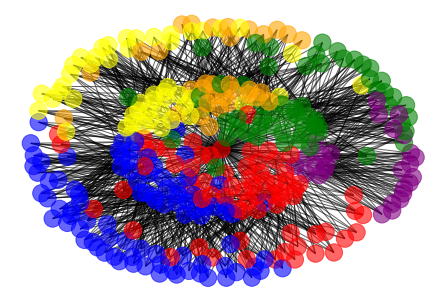

In [53]:
# Visualize the 6 communities

communities_list = list(communities)
# Create an empty lost to store the colors
color_map_6 = []

# List of colors 
colors = ['blue', 'red', 'green', 'yellow', 'orange',"purple"]

# Then we iterate over the nodes of the network, and also the 5 possible communities
# And get the color based on that

for node in G_sub.nodes():
    for i in range(6):
        if node in communities_list[i]:
            color_map_6.append(colors[i])
            
# Finally visualize the network
nx.draw_kamada_kawai(G_sub, node_color=color_map_6,alpha=0.6)

In [56]:
# Inner join the below two dataframes 
# Zibo followers dataframe which contains the 1034 followers' information 
# and
# The modularity_dict which contains the data about which nodes belong to which community
community_series = pd.Series(modularity_dict)
zibo_followers_df=zibo_followers_df.set_index("Follower_id")
final = pd.merge(zibo_followers_df,community_series.to_frame(),left_index=True,right_index=True)
final.rename(columns = {0:'community'}, inplace = True)
final

,Location,Created_at,Followers_count,Friends_count,Favourites_count,Listed_count,Statuses_count,community
1491681657019322370,Guangdong,2022,587,1470,143.0,0,151,1
753600103932370944,"From Nzumosu, Numan Adamawa St",2016,1171,4598,17315.0,1,526,5
1234241392081326082,South Sudan,2020,64,683,2.0,0,7,5
1425222157995479051,"Dar es Salaam, Tanzania",2021,199,2433,422.0,10,518,5
145638688,El Tigre Edo Anz. Venezuela,2010,117,700,3002.0,0,42,3


The average of Created_at : 
 community
0    2020.243243
1    2018.340909
2    2017.968750
3    2017.608696
4    2020.526316
5    2020.100000
Name: Created_at, dtype: float64


The average of Followers_count : 
 community
0    1005.243243
1    7973.522727
2    1560.937500
3     506.869565
4     498.473684
5     360.000000
Name: Followers_count, dtype: float64


The average of Friends_count : 
 community
0    1888.810811
1    2194.477273
2    2430.250000
3    2902.739130
4    2311.578947
5    2257.400000
Name: Friends_count, dtype: float64


The average of Favourites_count : 
 community
0     4354.000000
1    15539.590909
2     3073.406250
3     8568.695652
4      924.894737
5     2865.200000
Name: Favourites_count, dtype: float64


The average of Listed_count : 
 community
0     2.621622
1    15.272727
2     1.750000
3     2.347826
4     0.315789
5     1.500000
Name: Listed_count, dtype: float64


The average of Statuses_count : 
 community
0     983.270270
1    9108.386364
2    1221.9

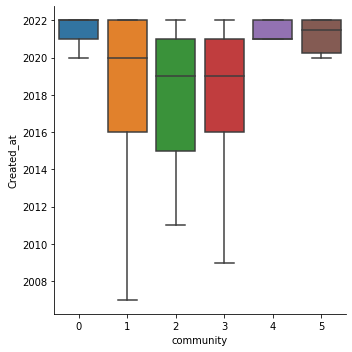

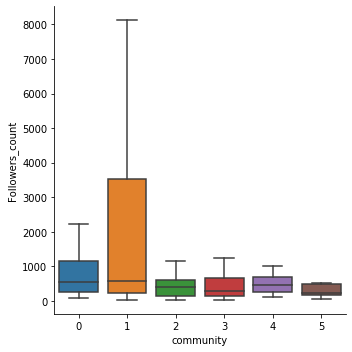

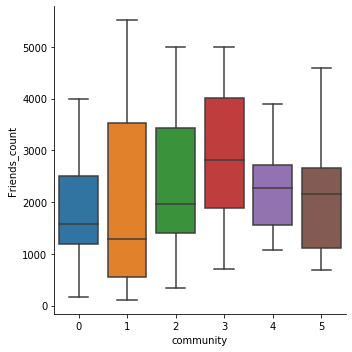

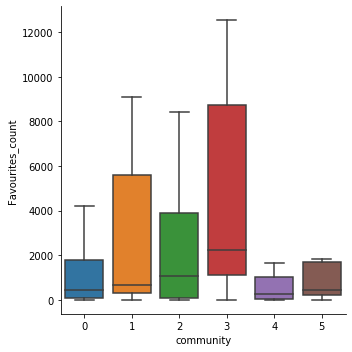

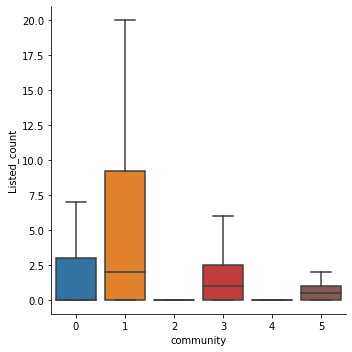

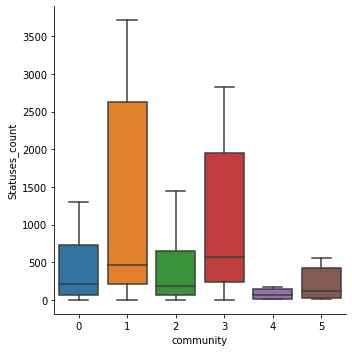

In [58]:
# Analyze and Visualize the information of followers based on diffrent communities.

a_list = list(final.columns)
a_list.remove("Location")
a_list.remove("community")


for a in a_list:
    print ("The average of",a,":","\n",final.groupby("community")[a].mean())
    print (sns.catplot(x="community", y=a,data=final,kind="box",showfliers = False))
    print ("\n")

In [59]:
# Check the most important nodes (based on the centrality measures before) belong to which community.

for col in df_top10.columns:
    print ("The most important nodes in the measure",col, "and communities they belong to:")
    print (final.loc[(final.index).isin (list(df_top10[col].values))].community)
    print ("\n")

The most important nodes in the measure Degree_Centrality and communities they belong to:
1536965081828929536    0
1248003589             5
1515869227135250433    5
816500962512642048     0
1568205383671619587    0
1448602662551924744    2
Name: community, dtype: int64


The most important nodes in the measure Closeness_Centrality and communities they belong to:
1569944793870123008    0
1536965081828929536    0
1248003589             5
1534459218610343937    1
816500962512642048     0
1568205383671619587    0
1382627176118243335    1
1478295802086768640    1
1486967468518219778    1
Name: community, dtype: int64


The most important nodes in the measure Betweenness_Centrality and communities they belong to:
1536965081828929536    0
1579504133979062272    0
1248003589             5
1912850424             0
1515869227135250433    5
816500962512642048     0
1568205383671619587    0
1448602662551924744    2
Name: community, dtype: int64


The most important nodes in the measure Eigenvector